# Data structuring

In [1]:
# Loading packages

import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load df from disk

df = pd.read_csv("speeches/data.csv")

In [ ]:
df.head()

In [ ]:
len(df)

In [3]:
df["Speech"] = df["Speech"].str.replace("transcript-inner", "").str.replace(u'\xa0', u' ')

In [ ]:
print(df['Speech'].loc[9])

In [4]:
# drops party orientation that isn't Rep or Dem
df2 = df.drop(df.index[92:108])

In [ ]:
df2.head()

In [5]:
# creates party dummy
Party_dummy = pd.get_dummies(df2['Party'], drop_first=True)
# Party_dummy

,Republican
0,1
1,1
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [6]:
df2['Republican'] = Party_dummy

In [ ]:
df2.head()
print(len(df2))

In [7]:
#Number of words in each speech
df2["word_count"] = df2["Speech"].apply(lambda x : len(x))
#Number of unique words in each speech
df2["unique_word"] = df2["Speech"].apply(lambda x : len(set(x.lower().split()) ) )
#Number of unique words ratio in each speech
df2["unique_word_ratio"] = df2.apply(lambda x : x["unique_word"]/x["word_count"] ,axis=1)
#Extracting year alone from the Date column
df2["year"] = df2["Date"].apply(lambda x : int(x.split(",")[2])  if len(x.split(","))==3 else int(x.split(",")[1]) )
df2.head()

,Unnamed: 0,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year
0,0,Donald Trump,"February 05, 2019",\r\n Transcript\r\n \r\nMadam Speake...,State of the Union,Republican,1,30958,1910,0.061696,2019
1,1,Donald Trump,"January 30, 2018","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Republican,1,30550,1906,0.062390,2018
2,2,Donald Trump,"January 20, 2017",\r\n Transcript\r\n Chief Justice Ro...,Inaugural Address,Republican,1,8561,622,0.072655,2017
3,3,Barack Obama,"January 12, 2016","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Democrat,0,35420,1931,0.054517,2016
4,4,Barack Obama,"January 20, 2015","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Democrat,0,40487,2068,0.051078,2015


In [ ]:
print(df2['Party'])

In [ ]:
sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="word_count", orient='v', hue='Republican', data=df2)
plt.title("Box plot of Word Count")
plt.xlabel("")
plt.ylabel("Word count")

In [ ]:
max(df2['word_count'])
min(df2['word_count'])

In [ ]:
# Trying to make to new dataframes; one with InAug speeches and one 
# with State.

df_inaug = []
df_state = []

for speech in df2['Type']:
    if 'Type'=='Inaugural Address':
        df_inaug.append
    else:
        df_state.append


#df_by_speech = df2.groupby('Type').head()

df_inaug = [g for _, g in df2.groupby('Type'=='Inaugural Address')]
df_state = [g for _, g in df2.groupby('Type'=='State of the Union')]

In [ ]:
df_inaug = df_by_speech['Type'=='Inaugural Adress']
df_inaug
print(len(df_inaug))
df_state = df_by_speech['Type'=='State of the Union']
print(len(df_state))

In [ ]:
# state of the union dataset
df_speech_des = df2.groupby('Type').describe().head()

In [ ]:
df_speech_des.head()

In [ ]:
df_speech_des['word_count']
with open('mytable.tex','w') as tf:
    tf.write(df_by_speech.to_latex())

Text(-8.700000000000003, 0.5, '')

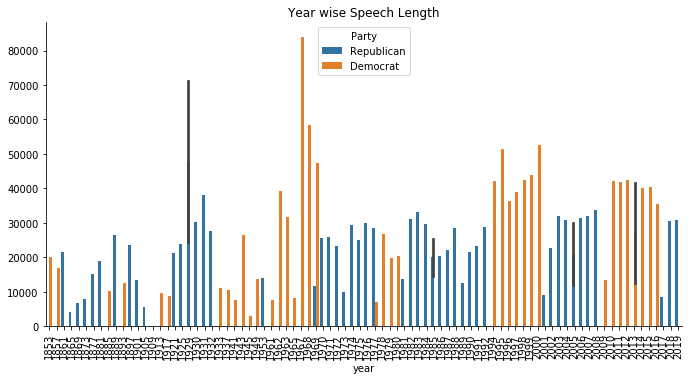

In [26]:
timeline = sns.catplot(x="year",y="word_count",hue="Party",data=df2,kind="bar",height=5,aspect=2,legend_out=False)
timeline.set_xticklabels(rotation=90)
plt.title("Year wise Speech Length")
plt.ylabel("")

# Text analysis

In [8]:
# Download positive and negative sentiment lexicons, split into words and convert to set representation. 
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';\n')[-1].split('\n'))
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';\n')[-1].split('\n'))
print(len(negative),len(positive))

4784 2007


In [9]:
# initialize tokenizer
#import nltk
#nltk.download('punkt')

from nltk import sent_tokenize, word_tokenize
#tokenizer = sent_tokenize

In [10]:
# define function
def sent_preproc(string):
    return sent_tokenize(string.lower())

In [11]:
def word_preproc(string):
    return word_tokenize(string.lower())

In [12]:
# apply function
sentences = df2.Speech.apply(sent_preproc)

In [13]:
words = df2.Speech.apply(word_preproc)

In [14]:
sentences.head()

0    [\r\n      transcript\r\n      \r\nmadam speak...
1    [\r\n      transcript\r\n      mr. speaker, mr...
2    [\r\n      transcript\r\n      chief justice r...
3    [\r\n      transcript\r\n      mr. speaker, mr...
4    [\r\n      transcript\r\n      mr. speaker, mr...
Name: Speech, dtype: object

In [15]:
words.head()

0    [transcript, madam, speaker, ,, mr., vice, pre...
1    [transcript, mr., speaker, ,, mr., vice, presi...
2    [transcript, chief, justice, roberts, ,, presi...
3    [transcript, mr., speaker, ,, mr., vice, presi...
4    [transcript, mr., speaker, ,, mr., vice, presi...
Name: Speech, dtype: object

In [21]:
# Defines function for counting number of matches with pos/neg words
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

In [22]:
df2['positive_words'] = words.apply(count_dictionary,dictionary=positive)
df2['negative_words'] = words.apply(count_dictionary,dictionary=negative)

In [38]:
# positive and negative words to total words ration
df2["positive_words_ratio"] = df2['positive_words']/df2['word_count']
df2["negative_words_ratio"] = df2['negative_words']/df2['word_count']

In [39]:
df2

,Unnamed: 0,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year,positive_words,negative_words,positive_word_ratio,negative_word_ratio,positive_words_ratio,negative_words_ratio
0,0,Donald Trump,"February 05, 2019",\r\n Transcript\r\n \r\nMadam Speake...,State of the Union,Republican,1,30958,1910,0.061696,2019,226,159,0.007300,0.005136,0.007300,0.005136
1,1,Donald Trump,"January 30, 2018","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Republican,1,30550,1906,0.062390,2018,232,132,0.007594,0.004321,0.007594,0.004321
2,2,Donald Trump,"January 20, 2017",\r\n Transcript\r\n Chief Justice Ro...,Inaugural Address,Republican,1,8561,622,0.072655,2017,77,26,0.008994,0.003037,0.008994,0.003037
3,3,Barack Obama,"January 12, 2016","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Democrat,0,35420,1931,0.054517,2016,276,145,0.007792,0.004094,0.007792,0.004094
4,4,Barack Obama,"January 20, 2015","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Democrat,0,40487,2068,0.051078,2015,299,162,0.007385,0.004001,0.007385,0.004001
5,5,Barack Obama,"January 28, 2014","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Democrat,0,40215,2167,0.053885,2014,304,133,0.007559,0.003307,0.007559,0.003307
6,6,Barack Obama,"February 13, 2013","\r\n Transcript\r\n \r\nMr. Speaker,...",State of the Union,Democrat,0,41426,2099,0.050669,2013,324,124,0.007821,0.002993,0.007821,0.002993
7,7,Barack Obama,"January 21, 2013",\r\n Transcript\r\n \r\nVice Preside...,Inaugural Address,Democrat,0,12499,868,0.069446,2013,102,48,0.008161,0.003840,0.008161,0.003840
8,8,Barack Obama,"January 24, 2012","\r\n Transcript\r\n Mr. Speaker, Mr...",State of the Union,Democrat,0,42453,2107,0.049631,2012,300,147,0.007067,0.003463,0.007067,0.003463
9,9,Barack Obama,"January 25, 2011","\r\n Transcript\r\n Mr. Speaker, Mr....",State of the Union,Democrat,0,41949,2083,0.049656,2011,283,103,0.006746,0.002455,0.006746,0.002455


## Positive and negative words

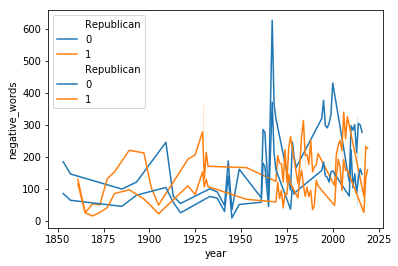

In [36]:
# plotting positive and negative words against each other 
sentiment = sns.lineplot(x="year",y="positive_words", hue='Republican', data=df2)
sentiment = sns.lineplot(x="year",y="negative_words", hue='Republican', data=df2)
plt.show()

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")

## Positive and negative words ratio

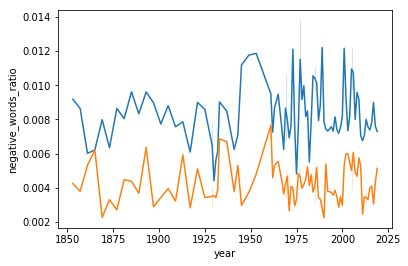

In [41]:
# plotting positive and negative words ratios against each other 
sentiment_r = sns.lineplot(x="year",y="positive_words_ratio", data=df2)
sentiment_r = sns.lineplot(x="year",y="negative_words_ratio", data=df2)
plt.show()

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")

## Sentiment analysis using VADER

In [45]:
#!pip install vaderSentiment

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [32]:
# using polarity_scores() to obtain the polarity indices for given sentence
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
# THIS TAKES A LONG TIME RUNNING, SO DON'T RUN IT JUST FOR FUN

# This doesn't work as well as the code below, but we might have
# to find a way to do a function that applies the VADER to
# every single row... if that isn't what we are doing below.

# applying the sentiment_analyzer function
vader_sent = df2['Speech'].apply(sentiment_analyzer_scores)

In [ ]:
# THIS TAKES A LONG TIME RUNNING, SO DON'T RUN IT JUST FOR FUN

# applying the sentiment_analyzer function
vader_sent = df2['Speech'].apply(sentiment_analyzer_scores)

In [56]:
vader_sent_df1 = pd.DataFrame(vader_sent1.tolist())
vader_sent_df1.head()

,compound,neg,neu,pos
0,0.9999,0.123,0.700,0.176
1,0.9999,0.111,0.716,0.173
2,0.9998,0.072,0.711,0.217
3,0.9999,0.099,0.731,0.171
4,1.0000,0.083,0.739,0.178


In [54]:
# A TRY AT THE VADER IMPLEMENTATION. DIDN'T WORK.

#def nltk_sentiment(sentence):
 #   from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
 #   nltk_sentiment = SentimentIntensityAnalyzer()
 #   score = nltk_sentiment.polarity_scores(sentence)
 #   return score

In [ ]:
#nltk_results = [nltk_sentiment(row) for row in df2]
#results_df = pd.DataFrame(nltk_results)
#text_df = pd.DataFrame(df2, columns=['Speech'])
#nltk_df = text_df.join(results_df)
#nltk_df